In [45]:
import numpy as np
import csv
import tensorflow as tf

tf.python.control_flow_ops = tf

#Resizing
from scipy.misc import imread
import scipy.misc as sp
def flip_merge(data):
    shape = (100,200)
    length = len(data['imgc'])
    X_train=[]
    y_train=[]
     
    for i in range(3):        
        if data[0][i]=='center':
            for i, loc in zip(range(length),data['imgc']):
                if(i==0):
                    continue
                else:
                    image = sp.imresize(imread(loc),size=shape)
                    X_train.append(image[30:96,:])                      
                    y_train.append(data['angle'][i])
                    print("Center camera resizing",i,"/",length-1)
                    
        elif data[0][i]=='left':
            for i, loc in zip(range(length),data['imgl']):
                if(i==0):
                    continue
                else:
                    image = sp.imresize(imread(loc),size=shape)
                    X_train.append(image[30:96,:])
                    y_train.append(data['angle'][i]+0.25)
                    print("Left camera resizing",i,"/",length-1)
                    
        elif data[0][i]=='right':
            for i, loc in zip(range(length),data['imgr']):
                if(i==0):
                    continue
                else:
                    image = sp.imresize(imread(loc),size=shape)
                    X_train.append(image[30:96,:])         
                    y_train.append(data['angle'][i]-0.25)
                    print("Right camera resizing",i,"/",length-1)            
                    
    print("Fliping..")
    
    y_train = np.array(y_train).astype(np.float32)
    
    a=[]
    for i in range(len(X_train)):
        a.append(np.fliplr(X_train[i]))
    X_train = np.array(X_train)
    X_train = np.vstack((X_train,a))
    y_train = np.concatenate((y_train,-y_train))
    print("X_train shape: ",X_train.shape)
    print("y_train shape: ",y_train.shape)
    return X_train, y_train
    
#Model
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D   
from keras.layers.advanced_activations import ELU
from keras.optimizers import Adam
def model():
    model = Sequential()
    elu = ELU(alpha=1.0)    
    model.add(Convolution2D(24, 5, 5,input_shape=(66, 200, 3),subsample=(2, 2),name='C1'))
    model.add(elu)
    model.add(Dropout(0.5))
    model.add(Convolution2D(36, 5, 5,subsample=(2, 2), name='C2'))
    model.add(elu)
    model.add(Dropout(0.5))
    model.add(Convolution2D(48, 5, 5,subsample=(2, 2),name='C3'))
    model.add(elu)
    model.add(Dropout(0.5))
    model.add(Convolution2D(64, 3, 3,name='C4'))
    model.add(elu)
    model.add(Convolution2D(64, 3, 3,name='C5'))
    model.add(elu)
    model.add(Flatten())
    model.add(Dense(100,name='L1'))
    model.add(elu)
    model.add(Dense(50,name='L2'))    
    model.add(elu)
    model.add(Dense(10,name='L3'))
    model.add(Dense(1,name='L4'))
    return model

#Data Loading

#dummy
data = np.genfromtxt('./a.csv',dtype=[('imgc','U110'),('imgl','U110'),('imgr','U110'),('angle','f8')],delimiter=",",usecols=(0,1,2,3))
#udacity
#data = np.genfromtxt('./data/driving_log.csv',dtype=[('imgc','U110'),('imgl','U110'),('imgr','U110'),('angle','U12')],delimiter=",",usecols=(0,1,2,3))

X_train, y_train = flip_merge(data)

#Shuffle
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train) 

#Complie
model = model()
model.compile(Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train, 
    nb_epoch=3, 
    validation_split=0.05)
    
#Save Model
from keras.models import load_model
import json

json_str = model.to_json()
with open('model.json','w') as f:
    json.dump(json_str, f)
model.save_weights('model.h5')
print("Saved model to disk")


Center camera resizing 1 / 2
Center camera resizing 2 / 2
Left camera resizing 1 / 2
Left camera resizing 2 / 2
Right camera resizing 1 / 2
Right camera resizing 2 / 2
Fliping..
X_train shape:  (12, 66, 200, 3)
y_train shape:  (12,)
Train on 11 samples, validate on 1 samples
Epoch 1/3
11/11 [==============================] - 0s - loss: 369.9579 - acc: 0.0000e+00 - val_loss: 6.1338 - val_acc: 0.0000e+00
Epoch 2/3
11/11 [==============================] - 0s - loss: 163.4094 - acc: 0.0000e+00 - val_loss: 16.1130 - val_acc: 0.0000e+00
Epoch 3/3
11/11 [==============================] - 0s - loss: 97.2020 - acc: 0.0000e+00 - val_loss: 22.5413 - val_acc: 0.0000e+00
Saved model to disk


0.733333


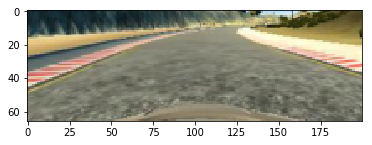

In [39]:
#Trash can

import numpy as np
import csv
from scipy.misc import imread
import scipy.misc as sp
import matplotlib.pyplot as plt

#Normalize
def normalize(image_data):
    a = -1
    b = 1
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )




#image = np.fliplr(X_train[3])
i=6
image = X_train[i]
print(y_train[i])
#image = np.load("./a.npy")   
#image = np.fliplr(image)
#image = np.invert(image)
plt.imshow(image)
plt.show()


#np.concatenate((a, b), axis=0)
